Варіант 9

In [5]:
import time
import pandas as pd
import numpy as np
import pyswarms as ps
from pyswarms.utils.plotters import plot_cost_history
import matplotlib.pyplot as plt

In [46]:
xls = pd.ExcelFile(r"DataRegression.xlsx")
sheetX = xls.parse(8)
x, y = sheetX['x'], sheetX['y']
print(x,y)

0       0
1      10
2      20
3      30
4      40
5      50
6      60
7      70
8      80
9      90
10    100
11    110
12    120
13    130
14    140
15    150
16    160
17    170
18    180
19    190
20    200
21    210
22    220
23    230
24    240
25    250
26    260
27    270
28    280
29    290
30    300
31    310
32    320
Name: x, dtype: int64 0     0.844
1     0.908
2     0.932
3     0.936
4     0.925
5     0.908
6     0.881
7     0.850
8     0.818
9     0.784
10    0.751
11    0.718
12    0.685
13    0.658
14    0.628
15    0.603
16    0.580
17    0.558
18    0.538
19    0.522
20    0.506
21    0.490
22    0.478
23    0.467
24    0.457
25    0.448
26    0.438
27    0.431
28    0.424
29    0.420
30    0.414
31    0.411
32    0.406
Name: y, dtype: float64


In [7]:
def funcModel(b):
    Model = b[0] + b[1]*np.exp(-x*b[3])+b[2]*np.exp(-x*b[4])
    return Model

In [8]:
def funcError(params):
    N = params.shape[0]
    s = np.zeros(N)
    for i in range(N):
        R = funcModel(params[i,:])
        s[i] = np.sum((y-R)**2)

    return s

In [9]:
options = {'c1': 0.5, 'c2': 1, 'w':0.8}
min_bound = [0, 0, -2, -2, -2]
max_bound = [10, 5, 2,  2,  2]
bounds = (min_bound, max_bound)
optimizer = ps.single.GlobalBestPSO(n_particles=300, dimensions=5, options=options, bounds=bounds)

In [10]:
t0 = time.time()
cost, pos = optimizer.optimize(funcError, iters=200)
t1 = time.time()
print('time (in sec) is', t1-t0)

2024-06-02 21:30:43,872 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 1, 'w': 0.8}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=0.00367
2024-06-02 21:32:19,954 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0036659610968744305, best pos: [ 0.28253876  0.8951158  -0.32848526  0.00667486  0.04941344]


time (in sec) is 96.08390140533447


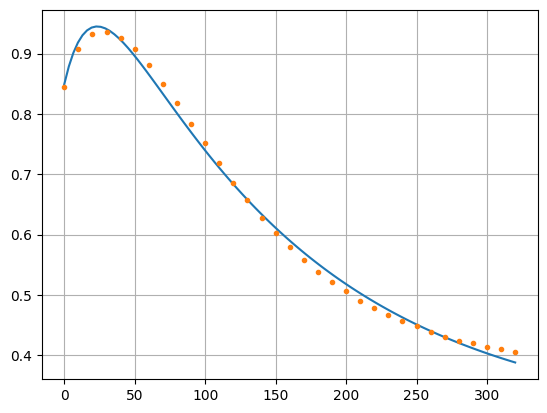

In [11]:
xx = np.linspace(min(x),max(x),100)
yy = pos[0] + pos[1]*np.exp(-xx*pos[3])+pos[2]*np.exp(-xx*pos[4])
plt.plot(xx,yy), plt.plot(x,y,'.'), plt.grid('on')
plt.show()

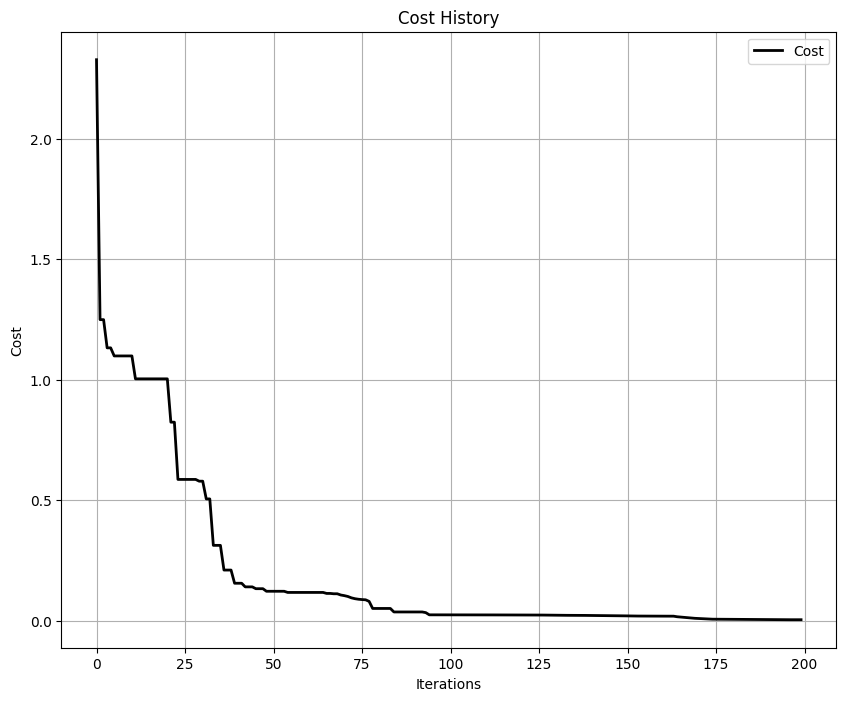

In [12]:
plot_cost_history(cost_history=optimizer.cost_history), plt.grid('on')
plt.show()

In [13]:
from scipy.optimize import rosen, differential_evolution
import time as t

In [14]:
def funcModel1(b):
    Model = b[0] + b[1] * np.exp(-x * b[3]) + b[2] * np.exp(-x * b[4])
    return np.sum((Model - y) ** 2)

In [15]:
cost_history=[]

In [16]:
def callback(xk, convergence):
    cost_history.append(funcModel1(xk))

In [17]:
bounds1=[(0, 10), (0, 5), (-2, 2), (-2, 2), (-2, 2)]
result = differential_evolution(funcModel1, bounds1, maxiter=300, popsize=50, mutation=(0.5, 1), recombination=0.7, callback=callback)
tn = t.time()
print(result.x, result.fun)
print('time is',tn-t0)

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


[ 0.37513987  1.91304812 -1.44160813  0.01281723  0.02220924] 5.4687440461172926e-05
time is 190.758930683136


In [18]:
pos1 = result.x
cost1 = result.fun

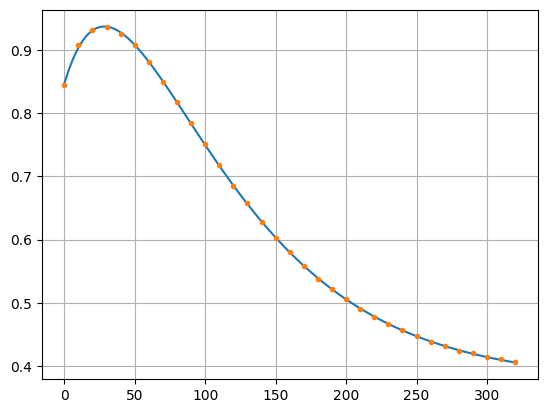

In [19]:
xx1 = np.linspace(min(x),max(x),100)
yy1 = pos1[0] + pos1[1]*np.exp(-xx1*pos1[3])+pos1[2]*np.exp(-xx1*pos1[4])
plt.plot(xx1,yy1), plt.plot(x,y,'.'), plt.grid('on')
plt.show()

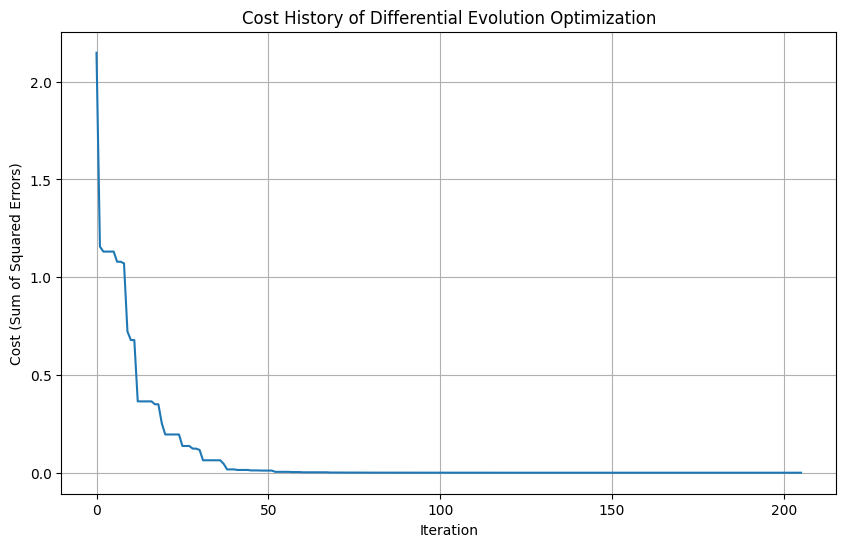

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(cost_history, linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Cost (Sum of Squared Errors)')
plt.title('Cost History of Differential Evolution Optimization')
plt.grid(True)
plt.show()

In [21]:
xls18 = pd.ExcelFile(r"DataRegression.xlsx")
sheetX = xls.parse(17)
x18, y18 = sheetX['x'], sheetX['y']
print(x18,y18)

0       7.447168
1       8.102586
2       8.452547
3       8.711278
4       8.916774
         ...    
149    12.245990
150    12.252620
151    12.259200
152    12.265750
153    12.272240
Name: x, Length: 154, dtype: float64 0     -34.834702
1     -34.393200
2     -34.152901
3     -33.979099
4     -33.845901
         ...    
149   -31.801300
150   -31.798401
151   -31.795500
152   -31.789700
153   -31.786800
Name: y, Length: 154, dtype: float64


In [22]:
def funcModel18(b):
    Model = b[0] * (b[1] + x18)**(-1/b[2])
    return Model

In [23]:
def funcError18(params):
    N = params.shape[0]
    s = np.zeros(N)
    for i in range(N):
        R = funcModel18(params[i,:])
        s[i] = np.sum((y18-R)**2)

    return s

In [24]:
options1 = {'c1': 0.5, 'c2': 1, 'w':0.8}
min_bound18 = [-10000, 1, 0]
max_bound18 = [-1000, 100, 1]
bounds18 = (min_bound18, max_bound18)
optimizer18 = ps.single.GlobalBestPSO(n_particles=300, dimensions=3, options=options1, bounds=bounds18)

In [25]:
t0 = time.time()
cost18, pos18 = optimizer18.optimize(funcError18, iters=200)
t1 = time.time()
print('time (in sec) is', t1-t0)

2024-06-02 21:33:55,347 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 1, 'w': 0.8}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=0.00101
2024-06-02 21:34:45,715 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0010059996436152289, best pos: [-6.06916691e+03  5.57376490e+01  8.03438996e-01]


time (in sec) is 50.37164497375488


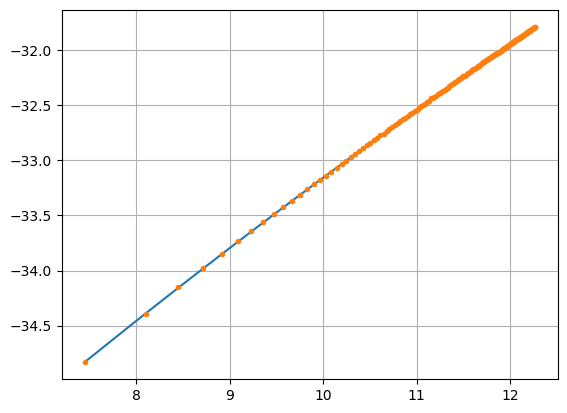

In [26]:
xx18 = np.linspace(min(x18),max(x18),100)
yy18 = pos18[0] * (pos18[1] + xx18)**(-1/pos18[2])
plt.plot(xx18,yy18), plt.plot(x18,y18,'.'), plt.grid('on')
plt.show()

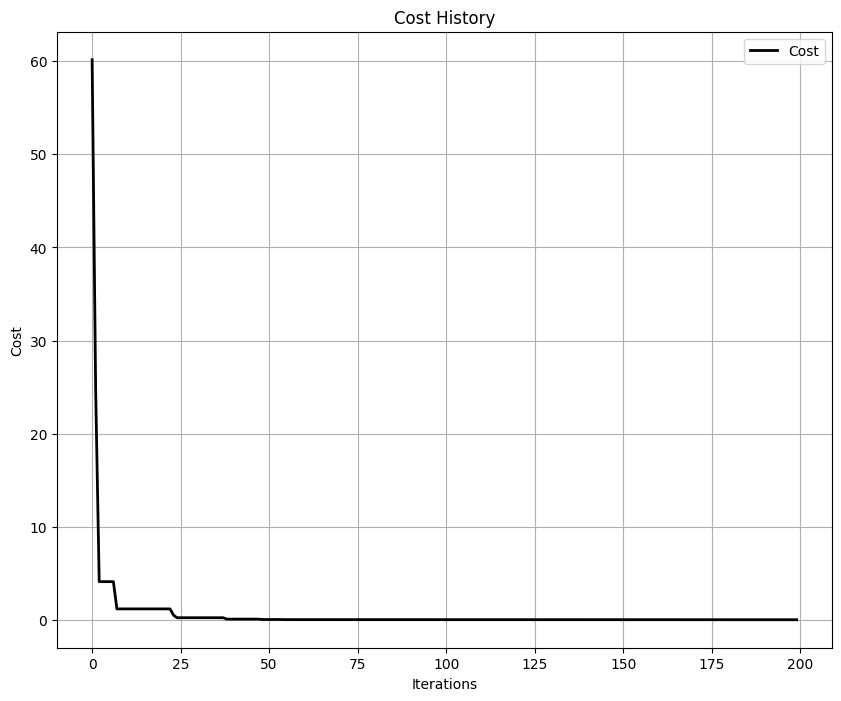

In [27]:
plot_cost_history(cost_history=optimizer18.cost_history), plt.grid('on')
plt.show()

In [28]:
def funcModel18_1(b):
    Model = b[0] * (b[1] + x18)**(-1/b[2])
    return np.sum((Model - y18) ** 2)

In [29]:
cost_history1=[]

In [30]:
def callback18(xk, convergence):
    cost_history1.append(funcModel18_1(xk))

In [31]:
bounds18_1=[(-10000, -1000), (1, 100), (0, 1)]
result18 = differential_evolution(funcModel18_1, bounds18_1, maxiter=250, popsize=50, mutation=(0.5, 1), recombination=0.7, callback=callback18)
tn = t.time()
print(result18.x, result18.fun)
print('time is',tn-t0)

[-3.97336380e+03  5.14988072e+01  8.60610537e-01] 0.0005671986081089592
time is 64.7815477848053


In [32]:
pos18_1 = result18.x
cost18_1 = result18.fun

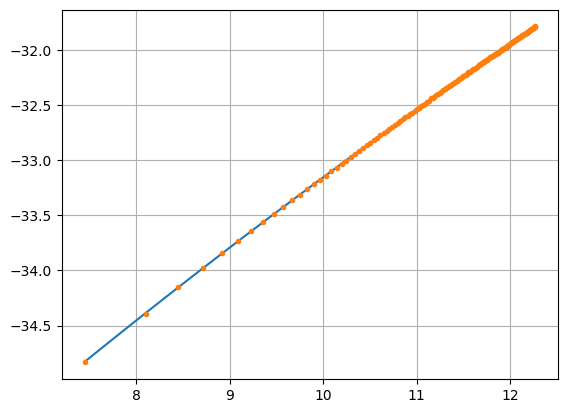

In [33]:
xx18_1 = np.linspace(min(x18),max(x18),100)
yy18_1 = pos18_1[0] * (pos18_1[1] + xx18_1)**(-1/pos18_1[2])
plt.plot(xx18_1,yy18_1), plt.plot(x18,y18,'.'), plt.grid('on')
plt.show()

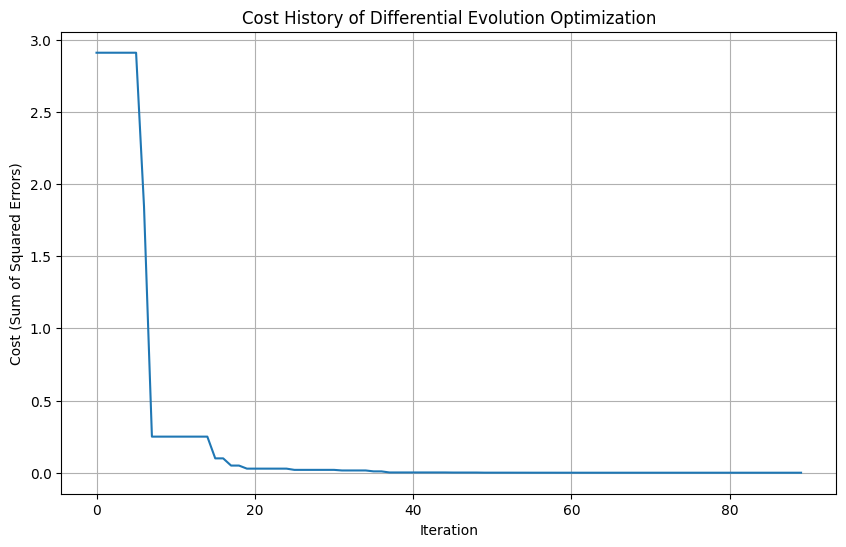

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(cost_history1, linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Cost (Sum of Squared Errors)')
plt.title('Cost History of Differential Evolution Optimization')
plt.grid(True)
plt.show()

In [35]:
import sys

In [36]:
def rosenbrock2(x):
    condition = (x[:, 0]**2 + x[:, 1]**2) >= 2
    func_values = (1 - x[:, 0])**2 + 100 * (x[:, 1] - x[:, 0]**2)**2
    func_values[condition] = 100000
    return func_values

In [37]:
def simionesk(x):
    X = x[:, 0]
    Y = x[:, 1]
    f = 0.1 * X * Y
    condition = (X**2 + Y**2) >= (1 - 0.2 * np.cos(8 * np.arctan2(Y, X)))**2
    f[condition] = sys.maxsize
    return f

In [38]:
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

In [39]:
# Call instance of PSO
dimensions = 2
min_bound = [-1.5]*dimensions
max_bound = [1.5]*dimensions
bounds = (min_bound, max_bound)
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=2, options=options, bounds=bounds)

In [40]:
# Perform optimization
cost, pos = optimizer.optimize(rosenbrock2, iters=500)

2024-06-02 21:35:00,779 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|500/500, best_cost=1.25e-15
2024-06-02 21:35:02,190 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.2482775174834748e-15, best pos: [0.99999996 0.99999993]


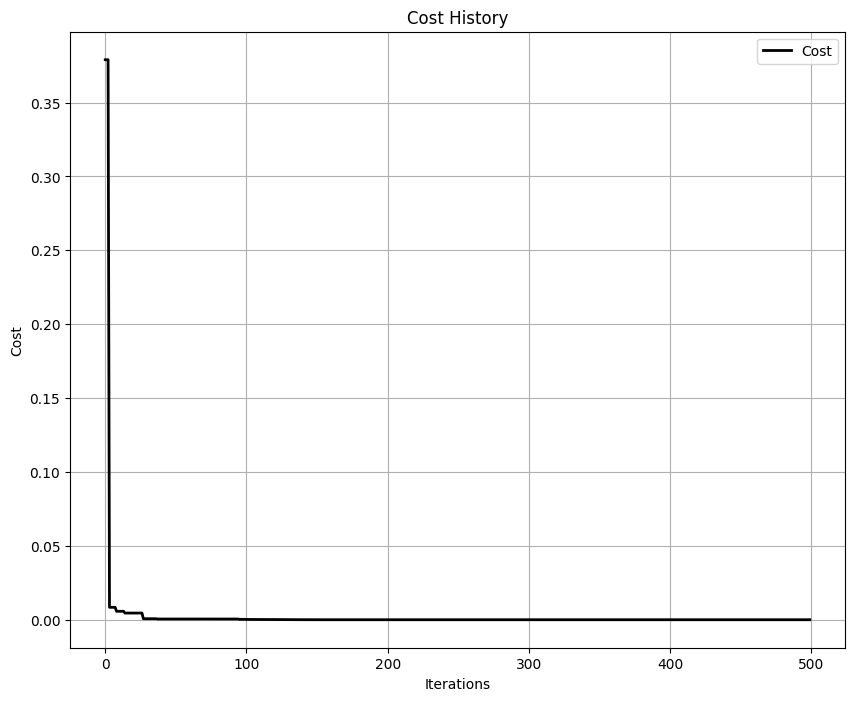

In [41]:
import matplotlib.pyplot as plt
from pyswarms.utils.plotters import plot_cost_history
plot_cost_history(cost_history=optimizer.cost_history), plt.grid('on')
plt.show()

In [42]:
# Call instance of PSO
dimensions = 2
min_bound = [-1.25]*dimensions
max_bound = [1.25]*dimensions
bounds = (min_bound, max_bound)
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=2, options=options, bounds=bounds)

In [43]:
cost, pos = optimizer.optimize(simionesk, iters=500)

2024-06-02 21:35:03,014 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|500/500, best_cost=-0.0546
2024-06-02 21:35:04,103 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.05462956577339203, best pos: [ 1.04416271 -0.52319016]


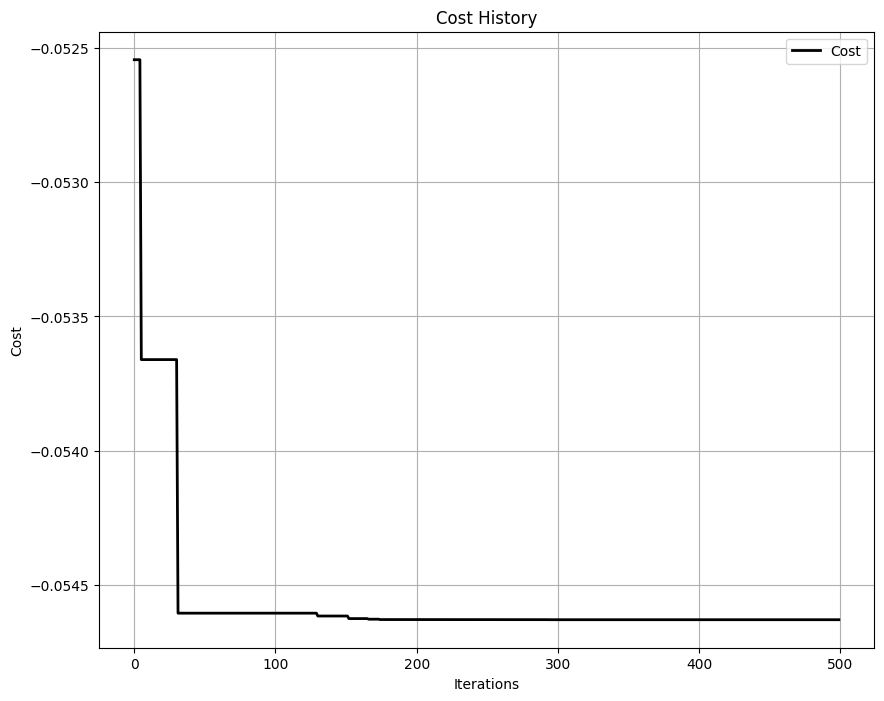

In [44]:
plot_cost_history(cost_history=optimizer.cost_history), plt.grid('on')
plt.show()

In [71]:
cost_history2=[]

In [72]:
def callback(xk, convergence):
    cost_history2.append(rosenbrock2(xk))

In [73]:
def rosenbrock2(x):
    condition = np.array(x[0])**2 + np.array(x[1])**2 >= 2

    func_values = np.array((1-x[0])**2 + 100*(x[1]-x[0]**2)**2)
    func_values[condition] = 100000
    return func_values

In [74]:
bounds1=[(-1.5, 1.5), (-1.5, 1.5)]
result = differential_evolution(rosenbrock2, bounds1, maxiter=300, popsize=50, mutation=(0.5, 1), recombination=0.7, callback=callback)
tn = t.time()
print(result.x, result.fun)
print('time is',tn-t0)

[1. 1.] 1.2818989709841442e-30
time is 948.1361794471741


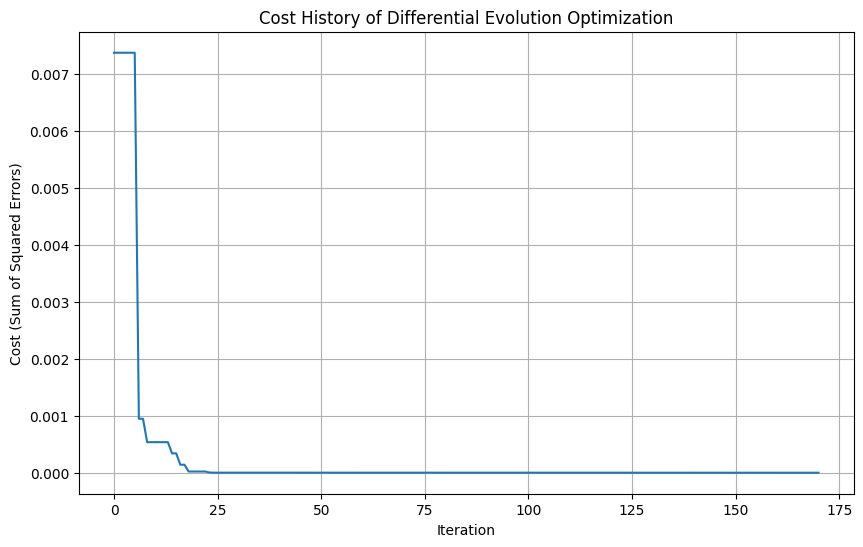

In [75]:
plt.figure(figsize=(10, 6))
plt.plot(cost_history2, linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Cost (Sum of Squared Errors)')
plt.title('Cost History of Differential Evolution Optimization')
plt.grid(True)
plt.show()

In [78]:
def simionesk(a):
    x, y = a
    f = 0.1 * x * y
    if x**2 + y**2 >= (1 - 0.2 * np.cos(8 * np.arctan2(y, x)))**2:
        f = sys.maxsize
    return f

In [86]:
cost_history3=[]

In [87]:
def callback(xk, convergence):
    cost_history3.append(simionesk(xk))

In [88]:
bounds1=[(-1.25, 1.25), (-1.25, 1.25)]
result = differential_evolution(simionesk, bounds1, maxiter=300, popsize=300, mutation=(0.5, 1), recombination=0.7, callback=callback)
tn = t.time()
print(result.x, result.fun)
print('time is',tn-t0)

[-1.04419678  0.52316129] -0.05462833348725089
time is 1331.170089006424


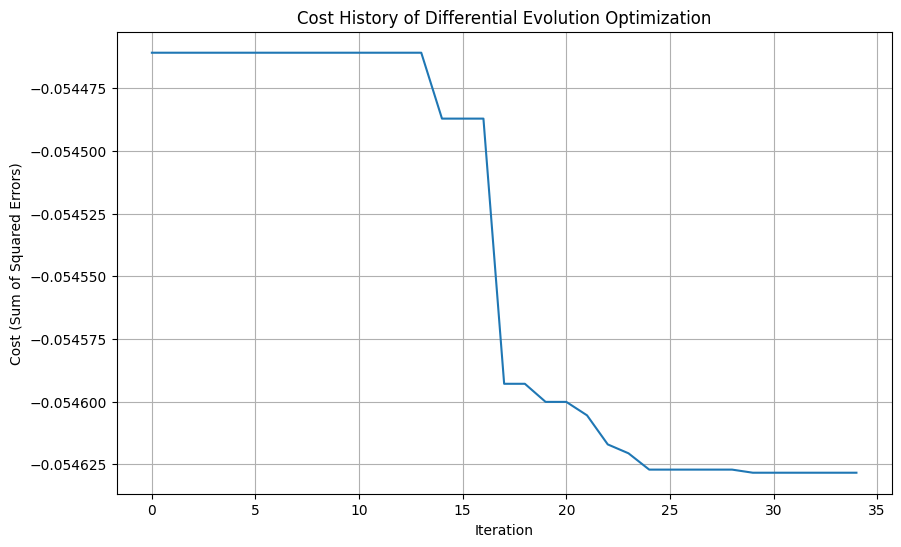

In [89]:
plt.figure(figsize=(10, 6))
plt.plot(cost_history3, linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Cost (Sum of Squared Errors)')
plt.title('Cost History of Differential Evolution Optimization')
plt.grid(True)
plt.show()